# Modeling

The goal of this page is to use the data we have to train a model that can predict how well a comment will do in reddit

In [234]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import nltk

In [235]:
df=pd.read_csv("train_comments.csv")
df.head()

,author,body,body_html,controversiality,created,created_utc,distinguished,downs,edited,gilded,id,likes,link_id,name,num_reports,parent_id,replies,score,subreddit,ups,pid,tokens,comment_length,n_tokens,keywords
0,SirT6,The title sort of misses the point of the stud...,"&lt;div class=""md""&gt;&lt;p&gt;The title sort ...",0,1447279564,1447250764,NaN,0,False,1,cwwhtv7,NaN,t3_3se6lu,t1_cwwhtv7,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",1359,science,1359,3se6lu,"Counter({'alga': 5, 'cancer': 4, 'cell': 4, 'd...",869,52,"{'toxinalgae': 1.009933774834437, 'cancer': 1...."
1,DrBiochemistry,Just want to point out that until I see a deli...,"&lt;div class=""md""&gt;&lt;p&gt;Just want to po...",0,1447277409,1447248609,NaN,0,False,0,cwwgxle,NaN,t3_3se6lu,t1_cwwgxle,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",3209,science,3209,3se6lu,"Counter({'kill': 2, 'deliveri': 2, 'cancer': 1...",307,30,"{'delivery': 1.0588235294117647, 'survives': 1..."
2,Frogblood,It's an interesting idea but the in vitro and ...,"&lt;div class=""md""&gt;&lt;p&gt;It&amp;#39;s an...",0,1447276156,1447247356,NaN,0,False,0,cwwggxu,NaN,t3_3se6lu,t1_cwwggxu,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",133,science,133,3se6lu,"Counter({'idea': 2, 'target': 2, 'overexcit': ...",432,39,"{'tumour': 1.0217391304347827, 'targeting': 1...."
3,mijn_ikke,Just waiting until somebody smarter than me co...,"&lt;div class=""md""&gt;&lt;p&gt;Just waiting un...",0,1447275611,1447246811,NaN,0,1447248944.0,1,cwwga6g,NaN,t3_3se6lu,t1_cwwga6g,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",773,science,773,3se6lu,"Counter({'thank': 1, 'gold': 1, 'point': 1, 'e...",163,12,"{'somebody': 1.0517241379310345, 'gold': 1.051..."
4,awhitt8,Yes the title is sensationalized.\n\n&gt;The m...,"&lt;div class=""md""&gt;&lt;p&gt;Yes the title i...",0,1447284967,1447256167,NaN,0,1447259263.0,0,cwwkopn,NaN,t3_3se6lu,t1_cwwkopn,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",16,science,16,3se6lu,"Counter({'drug': 5, 'deliveri': 4, 'materi': 3...",1447,104,"{'delivery': 1.030612244897959, 'title': 1.015..."


In [177]:
daf = pd.read_csv("train_articles.csv")
daf.head()

,authors,keywords,publish_date,summary,text,url,author,created_utc,domain,downs,gilded,is_self,likes,media,id,num_comments,num_reports,over_18,permalink,score,selftext,subreddit,thumbnail,title,ups,tokens,article_len,n_tokens
0,"[Derek Keats Flickr, Hannah Osborne, Marc Cirera]","{u'toxic': 1.01308139535, u'cancer': 1.0261627...",2015-11-10 16:00:00+00:00,Algae has been genetically engineered to kill ...,Algae has been genetically engineered to kill ...,http://www.ibtimes.co.uk/algae-genetically-eng...,the_phet,1447239366,ibtimes.co.uk,0,0,False,NaN,NaN,3se6lu,1073,NaN,False,/r/science/comments/3se6lu/algae_has_been_gene...,6705,NaN,science,http://b.thumbs.redditmedia.com/y1CGKgl69hKw-s...,Algae has been genetically engineered to kill ...,6705,"Counter({'alga': 11, 'drug': 9, 'cell': 8, 'ca...",2352,2352
1,"[Derek Keats Flickr, Hannah Osborne, Marc Cirera]","{u'toxic': 1.01308139535, u'cancer': 1.0261627...",2015-11-10 16:00:00+00:00,Algae has been genetically engineered to kill ...,Algae has been genetically engineered to kill ...,http://www.ibtimes.co.uk/algae-genetically-eng...,the_phet,1447239366,ibtimes.co.uk,0,0,False,NaN,NaN,3se6lu,1073,NaN,False,/r/science/comments/3se6lu/algae_has_been_gene...,6706,NaN,science,http://b.thumbs.redditmedia.com/y1CGKgl69hKw-s...,Algae has been genetically engineered to kill ...,6706,"Counter({'alga': 11, 'drug': 9, 'cell': 8, 'ca...",2352,2352
2,"[Derek Keats Flickr, Hannah Osborne, Marc Cirera]","{u'toxic': 1.01308139535, u'cancer': 1.0261627...",2015-11-10 16:00:00+00:00,Algae has been genetically engineered to kill ...,Algae has been genetically engineered to kill ...,http://www.ibtimes.co.uk/algae-genetically-eng...,the_phet,1447239366,ibtimes.co.uk,0,0,False,NaN,NaN,3se6lu,1073,NaN,False,/r/science/comments/3se6lu/algae_has_been_gene...,6708,NaN,science,http://b.thumbs.redditmedia.com/y1CGKgl69hKw-s...,Algae has been genetically engineered to kill ...,6708,"Counter({'alga': 11, 'drug': 9, 'cell': 8, 'ca...",2352,2352
3,[],"{u'diamond': 1.04316546763, u'laser': 1.008633...",None,"If Q-carbon is harder than diamond, why would ...","This is a collection of 0.02, 0.03 and 0.04 ca...",http://phys.org/news/2015-11-phase-carbon-diam...,skoalbrother,1448903226,phys.org,0,0,False,NaN,NaN,3uvg0o,2216,NaN,False,/r/science/comments/3uvg0o/researchers_find_ne...,6777,NaN,science,http://b.thumbs.redditmedia.com/hZrhEdBoJp22oE...,"Researchers find new phase of carbon, make dia...",6777,"Counter({'diamond': 21, 'qcarbon': 15, 'carbon...",4626,4626
4,[],"{u'diamond': 1.04316546763, u'laser': 1.008633...",None,"If Q-carbon is harder than diamond, why would ...","This is a collection of 0.02, 0.03 and 0.04 ca...",http://phys.org/news/2015-11-phase-carbon-diam...,skoalbrother,1448903226,phys.org,0,0,False,NaN,NaN,3uvg0o,2216,NaN,False,/r/science/comments/3uvg0o/researchers_find_ne...,6772,NaN,science,http://b.thumbs.redditmedia.com/hZrhEdBoJp22oE...,"Researchers find new phase of carbon, make dia...",6772,"Counter({'diamond': 21, 'qcarbon': 15, 'carbon...",4626,4626


In [196]:
daf[daf['id'] == '3se6lu'].ups.values

array([ 6705.,  6706.,  6708.])

In [187]:
a_up = []
a_len = []
a_score = []
a_text = []
def get_article(comment):
    x = comment
    article_id = x.replace(x[:3],'') 
    a_text.append(daf[daf['id'] == article_id].text)
    a_len.append(daf[daf['id'] == article_id].article_len)
    a_up.append(daf[daf['id'] == article_id].ups)
    

In [197]:
for row in df.parent_id.values:
    article_id = x.replace(x[:3],'') 
    a_text.append(daf[daf['id'] == article_id].text.values)
    a_len.append(daf[daf['id'] == article_id].article_len.values)
    a_up.append(daf[daf['id'] == article_id].ups.values)

In [209]:
article_id = []
for row in df.parent_id.values:
    article_id.append(row.replace(x[:3],''))

In [ ]:
for aid in article_id:
    dfr = daf[daf['id'] == aid]
    a_text.append(dfr[:1].text)
    a_len.append(dfr[:1].article_len)
    a_up.append(dfr[:1].ups)

# Data Cleaning

One Issue to address here is the presence of values that are missing, and were not cleaned correctly 
So here we search for any comments that were not submitted correctly

In [236]:
missing_index = df['created_utc'].index[df['created_utc'].apply(np.isnan)]

In [237]:
missing_index

Int64Index([2295, 2296, 12105, 12106, 27077, 27078, 27079, 27910, 27911, 28721, 28722, 32539, 32540, 33215, 33216, 44529, 44530, 69624, 69625, 88868, 88869, 88870, 109778, 109779, 110506, 110507, 110508, 173931, 173932, 175562, 175563, 175710, 175711, 179208, 179209, 179732, 179733, 179734, 182324, 182325, 203402, 203403, 205261, 205262, 206207, 206208, 214122, 214123, 219465, 219466, 245058, 245059, 263159, 263160, 276731, 276732], dtype='int64')

We then drop all the values that did not have a correcct submission time

In [238]:
#Drop all the values that have nan inside 
list1 = []
for index in missing_index:
    list1.append(index)

In [239]:
df = df.drop(df.index[list1])

# add some more features

Before beginning the analysis, there are a few more features that will be nice to add.

For example, the created UTC time, while it might be useful for a robot it is hard for a human to understand instantly.

Also we found from our EDA that time when posted matters greatly in terms of chance of getting high number of upvotes

In [240]:
import datetime
def convert_time(time):
    hour = datetime.datetime.fromtimestamp(time).strftime('%H')
    return int(hour)

In [241]:
df['time'] = df.created_utc.apply(convert_time)

Here is where  We use the nltk tokenizer to tokenize the body sentences that reddit comments have.

Using the Nltk corpus stop wrods, we filtered them, and furthur joined them to create tokenized sentences.

In [242]:
from nltk.tokenize import RegexpTokenizer
stopWords = nltk.corpus.stopwords.words('english') + ['.',',']
def tokenize(body):
    tokenizer = RegexpTokenizer(r'\w+')
    words = tokenizer.tokenize(unicode(str(body),"utf-8"))
    return [e.lower() for e in words if not e.lower() in stopWords]

In [243]:
df['token_body'] = df.body.apply(tokenize)

In [244]:
def tokensentence(token_body):
    return ' '.join(word for word in token_body)

In [245]:
df['token_sentence'] = df.token_body.apply(tokensentence)

The purpose of this function is to create a new indicator variable, over95th.
The sole purpose of this indicator variable is so that we can distiniguish between "good" reddit comment and bad comments.

As seen from the EDA, the comment data is very skewed, with the vast mojority of comments performing very poorly. Thus the over 119, will filter and indicate 1 if comment has this or more upvotes. 

In [246]:
def over95th(upvote):
    #119 is the threshold for 95th percentile
    if int(upvote) >= 119:
        return 1
    else:
        return 0
df['over95th'] = df.ups.apply(over95th)

In [247]:
df.head()

,author,body,body_html,controversiality,created,created_utc,distinguished,downs,edited,gilded,id,likes,link_id,name,num_reports,parent_id,replies,score,subreddit,ups,pid,tokens,comment_length,n_tokens,keywords,time,token_body,token_sentence,over95th
0,SirT6,The title sort of misses the point of the stud...,"&lt;div class=""md""&gt;&lt;p&gt;The title sort ...",0,1447279564,1447250764,NaN,0,False,1,cwwhtv7,NaN,t3_3se6lu,t1_cwwhtv7,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",1359,science,1359,3se6lu,"Counter({'alga': 5, 'cancer': 4, 'cell': 4, 'd...",869,52,"{'toxinalgae': 1.009933774834437, 'cancer': 1....",9,"[title, sort, misses, point, study, title, imp...",title sort misses point study title implies al...,1
1,DrBiochemistry,Just want to point out that until I see a deli...,"&lt;div class=""md""&gt;&lt;p&gt;Just want to po...",0,1447277409,1447248609,NaN,0,False,0,cwwgxle,NaN,t3_3se6lu,t1_cwwgxle,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",3209,science,3209,3se6lu,"Counter({'kill': 2, 'deliveri': 2, 'cancer': 1...",307,30,"{'delivery': 1.0588235294117647, 'survives': 1...",8,"[want, point, see, delivery, system, 1, surviv...",want point see delivery system 1 survives gast...,1
2,Frogblood,It's an interesting idea but the in vitro and ...,"&lt;div class=""md""&gt;&lt;p&gt;It&amp;#39;s an...",0,1447276156,1447247356,NaN,0,False,0,cwwggxu,NaN,t3_3se6lu,t1_cwwggxu,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",133,science,133,3se6lu,"Counter({'idea': 2, 'target': 2, 'overexcit': ...",432,39,"{'tumour': 1.0217391304347827, 'targeting': 1....",8,"[interesting, idea, vitro, vivo, data, prelimi...",interesting idea vitro vivo data preliminary d...,1
3,mijn_ikke,Just waiting until somebody smarter than me co...,"&lt;div class=""md""&gt;&lt;p&gt;Just waiting un...",0,1447275611,1447246811,NaN,0,1447248944.0,1,cwwga6g,NaN,t3_3se6lu,t1_cwwga6g,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",773,science,773,3se6lu,"Counter({'thank': 1, 'gold': 1, 'point': 1, 'e...",163,12,"{'somebody': 1.0517241379310345, 'gold': 1.051...",8,"[waiting, somebody, smarter, comes, along, poi...",waiting somebody smarter comes along point blo...,1
4,awhitt8,Yes the title is sensationalized.\n\n&gt;The m...,"&lt;div class=""md""&gt;&lt;p&gt;Yes the title i...",0,1447284967,1447256167,NaN,0,1447259263.0,0,cwwkopn,NaN,t3_3se6lu,t1_cwwkopn,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",16,science,16,3se6lu,"Counter({'drug': 5, 'deliveri': 4, 'materi': 3...",1447,104,"{'delivery': 1.030612244897959, 'title': 1.015...",10,"[yes, title, sensationalized, gt, intensively,...",yes title sensationalized gt intensively inves...,0


# Normalize reddit upvote scores

In [248]:
df[df.subreddit == 'politics'].ups.values.astype(int).max()

5005

In [249]:
subreddit = ['science', 'news', 'worldnews', 'dataisbeautiful', 'todayilearned', 'politics', 'technology', 'space', 'InternetIsBeautiful',
             'nottheonion', 'gadgets', 'Documentaries', 'UpliftingNews', 'programming', 'datascience', 'uspolitics', 'ukpolitics',
             'CanadaPolitics', 'Liberal', 'Conservative' , 'nba', 'soccer', 'nfl' , 'europe', 'food', 'SubredditSimulator']

In [250]:
size = {}
for sub in subreddit:
     size[sub] = df[df.subreddit == sub].shape[0]
size    

{'CanadaPolitics': 695,
 'Conservative': 1483,
 'Documentaries': 3892,
 'InternetIsBeautiful': 2840,
 'Liberal': 235,
 'SubredditSimulator': 972,
 'UpliftingNews': 3376,
 'dataisbeautiful': 4997,
 'datascience': 11,
 'europe': 3499,
 'food': 8902,
 'gadgets': 3325,
 'nba': 9072,
 'news': 121370,
 'nfl': 9034,
 'nottheonion': 7767,
 'politics': 13359,
 'programming': 2461,
 'science': 42561,
 'soccer': 7582,
 'space': 3345,
 'technology': 8577,
 'todayilearned': 15062,
 'ukpolitics': 1446,
 'uspolitics': 8,
 'worldnews': 17804}

In [251]:
topscores = {}
for sub in subreddit:
    topscores[sub] = df[df.subreddit == sub].ups.values.astype(int).max()

In [252]:
topscores

{'CanadaPolitics': 150,
 'Conservative': 214,
 'Documentaries': 1060,
 'InternetIsBeautiful': 1220,
 'Liberal': 48,
 'SubredditSimulator': 1766,
 'UpliftingNews': 2476,
 'dataisbeautiful': 3078,
 'datascience': 5,
 'europe': 1250,
 'food': 4785,
 'gadgets': 2467,
 'nba': 3760,
 'news': 7124,
 'nfl': 3792,
 'nottheonion': 4348,
 'politics': 5005,
 'programming': 1341,
 'science': 5136,
 'soccer': 3208,
 'space': 4521,
 'technology': 5302,
 'todayilearned': 5162,
 'ukpolitics': 313,
 'uspolitics': 5,
 'worldnews': 6619}

In [253]:
minscores = {}
for sub in subreddit:
    minscores[sub] = df[df.subreddit == sub].ups.values.astype(int).min()

In [254]:
minscores

{'CanadaPolitics': -9,
 'Conservative': -82,
 'Documentaries': -72,
 'InternetIsBeautiful': -11,
 'Liberal': -15,
 'SubredditSimulator': -2,
 'UpliftingNews': -42,
 'dataisbeautiful': -34,
 'datascience': 1,
 'europe': -69,
 'food': -267,
 'gadgets': -23,
 'nba': -72,
 'news': -152,
 'nfl': -123,
 'nottheonion': -1490,
 'politics': -92,
 'programming': -181,
 'science': -108,
 'soccer': -194,
 'space': -27,
 'technology': -137,
 'todayilearned': -98,
 'ukpolitics': -71,
 'uspolitics': 0,
 'worldnews': -58}

Here to normalize some of the data, we used the rescaling method.

x' = x - min(x)  / max(x) - min(x)

In [255]:
normscore = []
for row in df.index:
    try:
        normscore.append((float(df.ix[row].ups) - (minscores[df.ix[row].subreddit]))/
         ((topscores[df.ix[row].subreddit]) - (minscores[df.ix[row].subreddit])))
    except:
         normscore.append('nan')

In [256]:
df['normscore'] = normscore

In [257]:
df.head()

,author,body,body_html,controversiality,created,created_utc,distinguished,downs,edited,gilded,id,likes,link_id,name,num_reports,parent_id,replies,score,subreddit,ups,pid,tokens,comment_length,n_tokens,keywords,time,token_body,token_sentence,over95th,normscore
0,SirT6,The title sort of misses the point of the stud...,"&lt;div class=""md""&gt;&lt;p&gt;The title sort ...",0,1447279564,1447250764,NaN,0,False,1,cwwhtv7,NaN,t3_3se6lu,t1_cwwhtv7,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",1359,science,1359,3se6lu,"Counter({'alga': 5, 'cancer': 4, 'cell': 4, 'd...",869,52,"{'toxinalgae': 1.009933774834437, 'cancer': 1....",9,"[title, sort, misses, point, study, title, imp...",title sort misses point study title implies al...,1,0.279748
1,DrBiochemistry,Just want to point out that until I see a deli...,"&lt;div class=""md""&gt;&lt;p&gt;Just want to po...",0,1447277409,1447248609,NaN,0,False,0,cwwgxle,NaN,t3_3se6lu,t1_cwwgxle,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",3209,science,3209,3se6lu,"Counter({'kill': 2, 'deliveri': 2, 'cancer': 1...",307,30,"{'delivery': 1.0588235294117647, 'survives': 1...",8,"[want, point, see, delivery, system, 1, surviv...",want point see delivery system 1 survives gast...,1,0.632532
2,Frogblood,It's an interesting idea but the in vitro and ...,"&lt;div class=""md""&gt;&lt;p&gt;It&amp;#39;s an...",0,1447276156,1447247356,NaN,0,False,0,cwwggxu,NaN,t3_3se6lu,t1_cwwggxu,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",133,science,133,3se6lu,"Counter({'idea': 2, 'target': 2, 'overexcit': ...",432,39,"{'tumour': 1.0217391304347827, 'targeting': 1....",8,"[interesting, idea, vitro, vivo, data, prelimi...",interesting idea vitro vivo data preliminary d...,1,0.045957
3,mijn_ikke,Just waiting until somebody smarter than me co...,"&lt;div class=""md""&gt;&lt;p&gt;Just waiting un...",0,1447275611,1447246811,NaN,0,1447248944.0,1,cwwga6g,NaN,t3_3se6lu,t1_cwwga6g,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",773,science,773,3se6lu,"Counter({'thank': 1, 'gold': 1, 'point': 1, 'e...",163,12,"{'somebody': 1.0517241379310345, 'gold': 1.051...",8,"[waiting, somebody, smarter, comes, along, poi...",waiting somebody smarter comes along point blo...,1,0.168002
4,awhitt8,Yes the title is sensationalized.\n\n&gt;The m...,"&lt;div class=""md""&gt;&lt;p&gt;Yes the title i...",0,1447284967,1447256167,NaN,0,1447259263.0,0,cwwkopn,NaN,t3_3se6lu,t1_cwwkopn,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",16,science,16,3se6lu,"Counter({'drug': 5, 'deliveri': 4, 'materi': 3...",1447,104,"{'delivery': 1.030612244897959, 'title': 1.015...",10,"[yes, title, sensationalized, gt, intensively,...",yes title sensationalized gt intensively inves...,0,0.023646


The number of votes needed to break the 95th percentile is...
0.1875


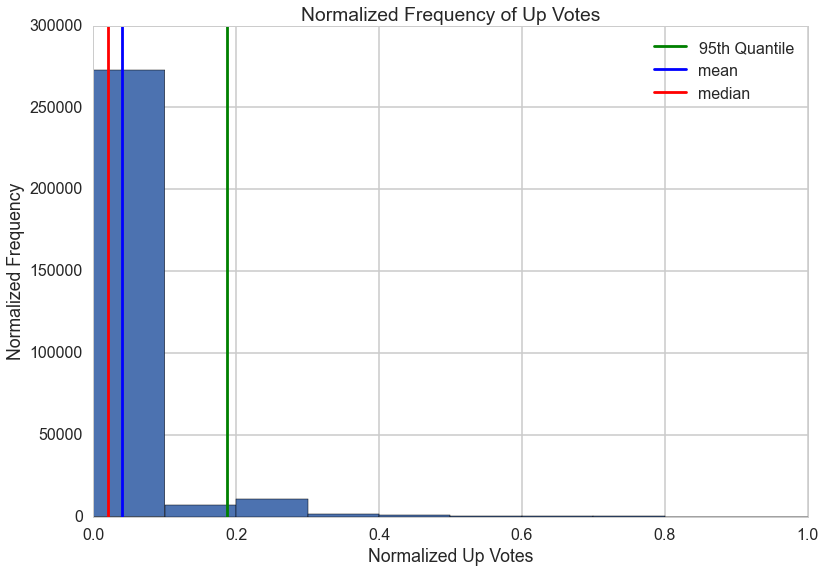

In [258]:
plt.hist(df.normscore)
plt.xlabel('Normalized Up Votes')
plt.ylabel('Normalized Frequency')
plt.title("Normalized Frequency of Up Votes")
p95 = np.percentile(df.normscore, 95)
plt.axvline(p95, color='g', label = '95th Quantile')
plt.axvline(np.average(df.normscore), label = "mean", c = 'b')
plt.axvline(np.median(df.normscore) , label = "median", c = 'r')
plt.legend(frameon=False, loc='upper right')
print "The number of votes needed to break the 95th percentile is..." 
print p95

In [259]:
def over95th(upvote):
    if float(upvote) >= 0.1875:
        return 1
    else:
        return 0
df['GoodComment'] = df.normscore.apply(over95th)

In [260]:
from sklearn.feature_extraction.text import TfidfVectorizer
def make_xy(df, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = TfidfVectorizer(min_df=1, stop_words='english')
    X = vectorizer.fit_transform(df.token_sentence)
    X = X.tocsc()  # some versions of sklearn return COO format
    y = (df.over95th == 1).values.astype(np.int)
    return X, y
X, y = make_xy(df)

In [261]:
X.shape, y.shape

((293675, 119136), (293675L,))

# Baseline Model

Here we created the baseline model to see if we can improve upon it.

In [262]:
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print 'Accuracy when predicting all are good commnets : ', metrics.accuracy_score(y_test, np.ones(y_test.shape))
print 'Accuracy when predicting all are bad commetns = ', metrics.accuracy_score(y_test,np.zeros(y_test.shape))

Accuracy when predicting all are good commnets :  0.0492891802162
Accuracy when predicting all are bad commetns =  0.950710819784


As expected, the baseline model numbers match the artificial cutoff line that we used to distinguish between good and bad comment links. There is a 5% chance of a comment being "good" and 95% chance of a comment being "bad".

In the next section, we will attempt to see if we can categorize them more accruately

# Naive Bayes 

In [142]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y)
clf = MultinomialNB().fit(xtrain, ytrain)
print "MN Accuracy: %0.2f%%" % (100 * clf.score(xtest, ytest))

MN Accuracy: 94.98%


In [143]:
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print "Accuracy on training data: %0.2f" % (training_accuracy)
print "Accuracy on test data:     %0.2f" % (test_accuracy)

Accuracy on training data: 0.95
Accuracy on test data:     0.95


As shown above, it seems that Naive Bayes model on the tokenized sentences show pretty much no improvement from the baseline scores

# Perform cross validation and select best parameter

In [144]:
from sklearn.cross_validation import KFold
def cv_score(clf, X, y, scorefunc):
    result = 0.
    nfold = 5
    for train, test in KFold(y.size, nfold): # split data into train/test groups, 5 times
        clf.fit(X[train], y[train]) # fit
        result += scorefunc(clf, X[test], y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [145]:
def log_likelihood(clf, x, y):
    prob = clf.predict_log_proba(x)
    bad = y == 0
    good = ~bad
    return prob[bad, 0].sum() + prob[good, 1].sum()

In [146]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(df.shape[0]), train_size=0.7)
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [147]:
#the grid of parameters to search over
alphas = [0, .1, 1, 5, 10, 50]
min_dfs = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
best_min_df = None
maxscore=-np.inf
for alpha in alphas:
    for min_df in min_dfs:         
        vectorizer = TfidfVectorizer(min_df = min_df)       
        Xthis, ythis = make_xy(df, vectorizer)
        Xtrainthis=Xthis[mask]
        ytrainthis=ythis[mask]
        #your code here
        clf = MultinomialNB(alpha=alpha)
        cvscore = cv_score(clf, Xtrainthis, ytrainthis, log_likelihood)

        if cvscore > maxscore:
            maxscore = cvscore
            best_alpha, best_min_df = alpha, min_df

In [148]:
print "alpha: %f" % best_alpha
print "min_df: %f" % best_min_df

alpha: 1.000000
min_df: 0.001000


In [149]:
vectorizer = TfidfVectorizer(min_df=best_min_df)
X, y = make_xy(df, vectorizer)
xtrain=X[mask]
ytrain=y[mask]
xtest=X[~mask]
ytest=y[~mask]

clf = MultinomialNB(alpha=best_alpha).fit(xtrain, ytrain)

# Your code here. Print the accuracy on the test and training dataset
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print "Accuracy on training data: %0.2f" % (training_accuracy)
print "Accuracy on test data:     %0.2f" % (test_accuracy)

Accuracy on training data: 0.95
Accuracy on test data:     0.95


In [150]:
from sklearn.metrics import confusion_matrix
print confusion_matrix(ytest, clf.predict(xtest))

[[83595     0]
 [ 4508     0]]


Theese matrix show very skewed results

The words at the bottom also tells us what words are good to use, and what are not so great words to use in a post

In [151]:
words = np.array(vectorizer.get_feature_names())

x = np.eye(xtest.shape[1])
probs = clf.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

print "Good words\t     P(over 100 upvote | word)"
for w, p in zip(good_words, good_prob):
    print "%20s" % w, "%0.2f" % (1 - np.exp(p))
    
print "Bad words\t     P(over 100 upvote | word)"
for w, p in zip(bad_words, bad_prob):
    print "%20s" % w, "%0.2f" % (1 - np.exp(p))

Good words	     P(over 100 upvote | word)
                edit 0.19
                gold 0.15
                  01 0.13
             claimed 0.13
                 pdf 0.13
       communication 0.12
           emergency 0.12
              update 0.12
          previously 0.12
             journal 0.12
Bad words	     P(over 100 upvote | word)
            explains 0.02
             chances 0.02
              gluten 0.02
                 yay 0.02
               kills 0.02
             confirm 0.02
              amazon 0.02
               taste 0.02
              cheese 0.02
           delicious 0.02


In [152]:
def calibration_plot(clf, xtest, ytest):
    prob = clf.predict_proba(xtest)[:, 1]
    outcome = ytest
    data = pd.DataFrame(dict(prob=prob, outcome=outcome))

    #group outcomes into bins of similar probability
    bins = np.linspace(0, 1, 20)
    cuts = pd.cut(prob, bins)
    binwidth = bins[1] - bins[0]
    
    #freshness ratio and number of examples in each bin
    cal = data.groupby(cuts).outcome.agg(['mean', 'count'])
    cal['pmid'] = (bins[:-1] + bins[1:]) / 2
    cal['sig'] = np.sqrt(cal.pmid * (1 - cal.pmid) / cal['count'])
        
    #the calibration plot
    ax = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    p = plt.errorbar(cal.pmid, cal['mean'], cal['sig'])
    plt.plot(cal.pmid, cal.pmid, linestyle='--', lw=1, color='k')
    plt.ylabel("Empirical P(Good)")
    
    #the distribution of P(fresh)
    ax = plt.subplot2grid((3, 1), (2, 0), sharex=ax)
    
    plt.bar(left=cal.pmid - binwidth / 2, height=cal['count'],
            width=.95 * (bins[1] - bins[0]),
            fc=p[0].get_color())
    
    plt.xlabel("Predicted P(Good)")
    plt.ylabel("Number")

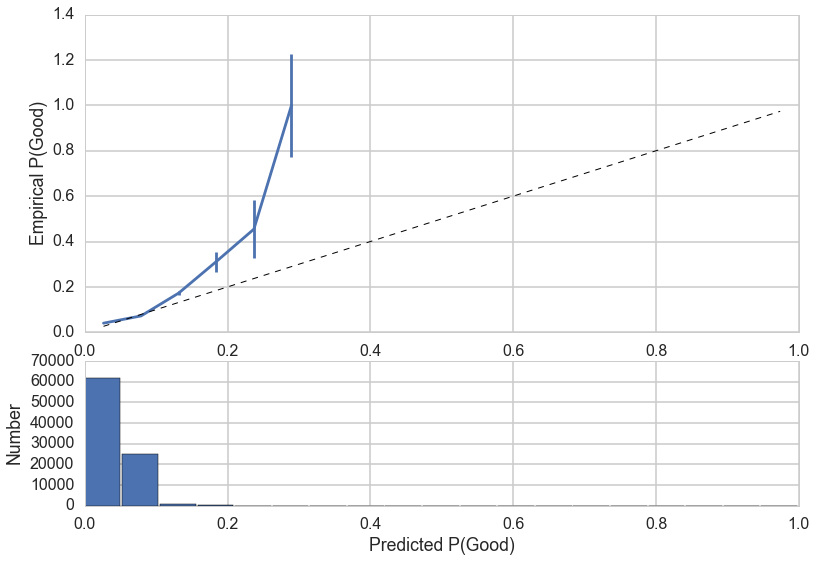

In [153]:
calibration_plot(clf, xtest, ytest)

# Conclusion is that Naive Bayes method does terribly when looking at entire subreddits

So here, we see if there is any improvemnt when focusing on specific subbreddit, in this case politics as politics tend to be one of the more polarizing topics

In [154]:
politics = df[df.subreddit == 'politics']

In [155]:
politics.head()

,author,body,body_html,controversiality,created,created_utc,distinguished,downs,edited,gilded,id,likes,link_id,name,num_reports,parent_id,replies,score,subreddit,ups,pid,tokens,comment_length,n_tokens,keywords,time,token_body,token_sentence,over500,norm_ups,normscore,GoodComment,over95th
56919,whocaresguy,start calling conservative radio complaining a...,"&lt;div class=""md""&gt;&lt;p&gt;start calling c...",0,1447028766,1446999966,NaN,0,1447044336.0,1,cwsy3gl,NaN,t3_3s0878,t1_cwsy3gl,NaN,t3_3s0878,"{u'kind': u'Listing', u'data': {u'modhash': No...",980,politics,980,3s0878,"Counter({'use': 3, 'obama': 2, 'like': 2, 'ins...",440,38,"{'term': 1.0202702702702702, 'used': 1.0202702...",11,"[start, calling, conservative, radio, complain...",start calling conservative radio complaining o...,good,0,0.210320,1,1
56920,TogaLord,They know. That's why they'll do it.,"&lt;div class=""md""&gt;&lt;p&gt;They know. That...",0,1447021979,1446993179,NaN,0,False,0,cwsuzm8,NaN,t3_3s0878,t1_cwsuzm8,NaN,t3_3s0878,"{u'kind': u'Listing', u'data': {u'modhash': No...",2139,politics,2139,3s0878,"Counter({'theyll': 1, 'know': 1, 'that': 1})",36,3,"{'theyll': 1.2142857142857142, 'know': 1.21428...",9,"[know, ll]",know ll,good,0,0.437708,1,1
56921,dzrtguy,Then we'll build a new internet with cocaine a...,"&lt;div class=""md""&gt;&lt;p&gt;Then we&amp;#39...",0,1447030760,1447001960,NaN,0,False,0,cwsz8ng,NaN,t3_3s0878,t1_cwsz8ng,NaN,t3_3s0878,"{u'kind': u'Listing', u'data': {u'modhash': No...",49,politics,49,3s0878,"Counter({'encrypt': 1, 'well': 1, 'cocain': 1,...",73,7,"{'hookers': 1.125, 'encryption': 1.125, 'cocai...",11,"[ll, build, new, internet, cocaine, hookers, e...",ll build new internet cocaine hookers encryption,bad,0,0.027663,0,0
56922,No_Fence,Some fun quotes regarding the TPP: \n\n“The ma...,"&lt;div class=""md""&gt;&lt;p&gt;Some fun quotes...",0,1447024523,1446995723,NaN,0,False,0,cwsw0ul,NaN,t3_3s0878,t1_cwsw0ul,NaN,t3_3s0878,"{u'kind': u'Listing', u'data': {u'modhash': No...",888,politics,888,3s0878,"Counter({'tpp': 7, 'trade': 3, 'corpor': 3, '\...",1374,105,"{'rights': 1.0140845070422535, 'wall': 1.01408...",10,"[fun, quotes, regarding, tpp, majority, congre...",fun quotes regarding tpp majority congress kep...,good,0,0.192270,1,1
56923,lanadapter,Apparently this bill is so bad it actually cam...,"&lt;div class=""md""&gt;&lt;p&gt;Apparently this...",0,1447029320,1447000520,NaN,0,False,0,cwsyehh,NaN,t3_3s0878,t1_cwsyehh,NaN,t3_3s0878,"{u'kind': u'Listing', u'data': {u'modhash': No...",142,politics,142,3s0878,"Counter({'life': 1, 'actual': 1, 'bill': 1, 's...",96,8,"{'life': 1.088235294117647, 'started': 1.08823...",11,"[apparently, bill, bad, actually, came, life, ...",apparently bill bad actually came life started...,bad,0,0.045909,0,1


In [156]:
X, y = make_xy(politics)

In [157]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y)
clf = MultinomialNB().fit(xtrain, ytrain)
print "MN Accuracy: %0.2f%%" % (100 * clf.score(xtest, ytest))

MN Accuracy: 96.56%


Here we can see an improvement of roughly 1.5% ! 

The narrowing of the topic definitely had an effect

In [158]:
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print "Accuracy on training data: %0.2f" % (training_accuracy)
print "Accuracy on test data:     %0.2f" % (test_accuracy)

Accuracy on training data: 0.96
Accuracy on test data:     0.97


In [159]:
itrain, itest = train_test_split(xrange(df.shape[0]), train_size=0.7)
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [160]:
#the grid of parameters to search over
alphas = [0, .1, 1, 5, 10, 50]
min_dfs = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
best_min_df = None
maxscore=-np.inf
for alpha in alphas:
    for min_df in min_dfs:         
        vectorizer = TfidfVectorizer(min_df = min_df)       
        Xthis, ythis = make_xy(df, vectorizer)
        Xtrainthis=Xthis[mask]
        ytrainthis=ythis[mask]
        #your code here
        clf = MultinomialNB(alpha=alpha)
        cvscore = cv_score(clf, Xtrainthis, ytrainthis, log_likelihood)

        if cvscore > maxscore:
            maxscore = cvscore
            best_alpha, best_min_df = alpha, min_df

In [161]:
print "alpha: %f" % best_alpha
print "min_df: %f" % best_min_df

alpha: 1.000000
min_df: 0.001000


In [162]:
vectorizer = TfidfVectorizer(min_df=best_min_df)
X, y = make_xy(df, vectorizer)
xtrain=X[mask]
ytrain=y[mask]
xtest=X[~mask]
ytest=y[~mask]

clf = MultinomialNB(alpha=best_alpha).fit(xtrain, ytrain)

# Your code here. Print the accuracy on the test and training dataset
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print "Accuracy on training data: %0.2f" % (training_accuracy)
print "Accuracy on test data:     %0.2f" % (test_accuracy)

Accuracy on training data: 0.95
Accuracy on test data:     0.95


In [163]:
from sklearn.metrics import confusion_matrix
print confusion_matrix(ytest, clf.predict(xtest))

[[83607     0]
 [ 4496     0]]


In [164]:
words = np.array(vectorizer.get_feature_names())

x = np.eye(xtest.shape[1])
probs = clf.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

print "Good words\t     P(over 100 upvote | word)"
for w, p in zip(good_words, good_prob):
    print "%20s" % w, "%0.2f" % (1 - np.exp(p))
    
print "Bad words\t     P(over 100 upvote | word)"
for w, p in zip(bad_words, bad_prob):
    print "%20s" % w, "%0.2f" % (1 - np.exp(p))

Good words	     P(over 100 upvote | word)
                edit 0.19
                gold 0.15
             claimed 0.14
          previously 0.13
                  09 0.12
                  05 0.12
                  gt 0.12
              update 0.11
              photos 0.11
            pointing 0.11
Bad words	     P(over 100 upvote | word)
            liberals 0.03
                 lol 0.03
         documentary 0.02
             suppose 0.02
               kills 0.02
               sugar 0.02
               taste 0.02
                 ain 0.02
           delicious 0.02
             chances 0.02


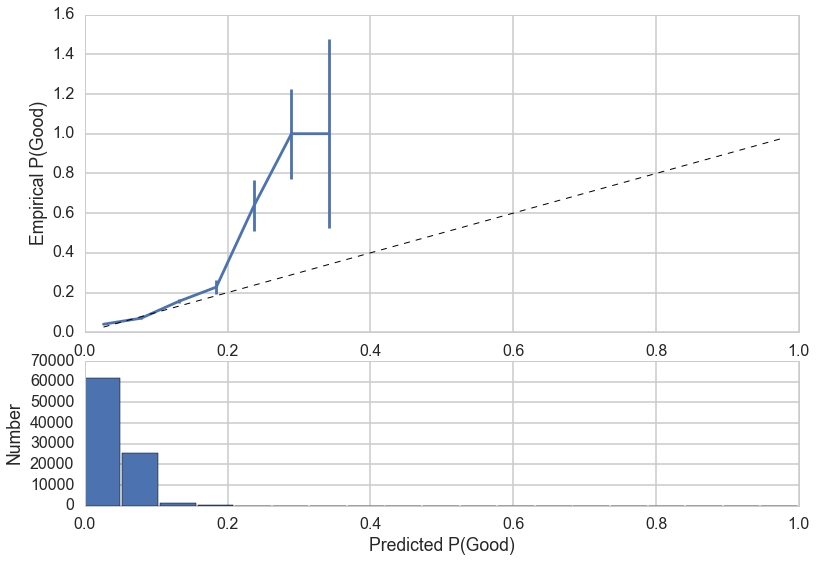

In [165]:
calibration_plot(clf, xtest, ytest)

We tried narrowing it down to another , even more polarizing subreddit, subreddit for conservatives

In [263]:
con = df[df.subreddit == 'Conservative']

In [264]:
X, y = make_xy(con)

In [265]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y)
clf = MultinomialNB().fit(xtrain, ytrain)
print "MN Accuracy: %0.2f%%" % (100 * clf.score(xtest, ytest))

MN Accuracy: 98.65%


Here we saw even more of an improvment, the Accuracy rose by almost 3.6 percentage points

In [266]:
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print "Accuracy on training data: %0.2f" % (training_accuracy)
print "Accuracy on test data:     %0.2f" % (test_accuracy)

Accuracy on training data: 0.98
Accuracy on test data:     0.99


In [267]:
itrain, itest = train_test_split(xrange(df.shape[0]), train_size=0.7)
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [268]:
#the grid of parameters to search over
alphas = [0, .1, 1, 5, 10, 50]
min_dfs = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
best_min_df = None
maxscore=-np.inf
for alpha in alphas:
    for min_df in min_dfs:         
        vectorizer = TfidfVectorizer(min_df = min_df)       
        Xthis, ythis = make_xy(df, vectorizer)
        Xtrainthis=Xthis[mask]
        ytrainthis=ythis[mask]
        #your code here
        clf = MultinomialNB(alpha=alpha)
        cvscore = cv_score(clf, Xtrainthis, ytrainthis, log_likelihood)

        if cvscore > maxscore:
            maxscore = cvscore
            best_alpha, best_min_df = alpha, min_df

In [269]:
print "alpha: %f" % best_alpha
print "min_df: %f" % best_min_df

alpha: 1.000000
min_df: 0.001000


In [273]:
vectorizer = TfidfVectorizer(min_df=best_min_df)
X, y = make_xy(df, vectorizer)
xtrain=X[mask]
ytrain=y[mask]
xtest=X[~mask]
ytest=y[~mask]

clf = MultinomialNB(alpha=best_alpha).fit(xtrain, ytrain)

# Your code here. Print the accuracy on the test and training dataset
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print "Accuracy on training data: %0.2f" % (training_accuracy)
print "Accuracy on test data:     %0.2f" % (test_accuracy)

Accuracy on training data: 0.95
Accuracy on test data:     0.95


In [271]:
words = np.array(vectorizer.get_feature_names())

x = np.eye(xtest.shape[1])
probs = clf.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

print "Good words\t     P(over 100 upvote | word)"
for w, p in zip(good_words, good_prob):
    print "%20s" % w, "%0.2f" % (1 - np.exp(p))
    
print "Bad words\t     P(over 100 upvote | word)"
for w, p in zip(bad_words, bad_prob):
    print "%20s" % w, "%0.2f" % (1 - np.exp(p))

Good words	     P(over 100 upvote | word)
                edit 0.20
              update 0.13
                gold 0.13
             journal 0.13
                 cnn 0.13
                  01 0.13
                 pdf 0.12
                  gt 0.12
             claimed 0.12
              center 0.12
Bad words	     P(over 100 upvote | word)
              amazon 0.02
             charity 0.02
            explains 0.02
               sugar 0.02
               cable 0.02
                isnt 0.02
               foods 0.02
           delicious 0.02
               taste 0.02
              cheese 0.02


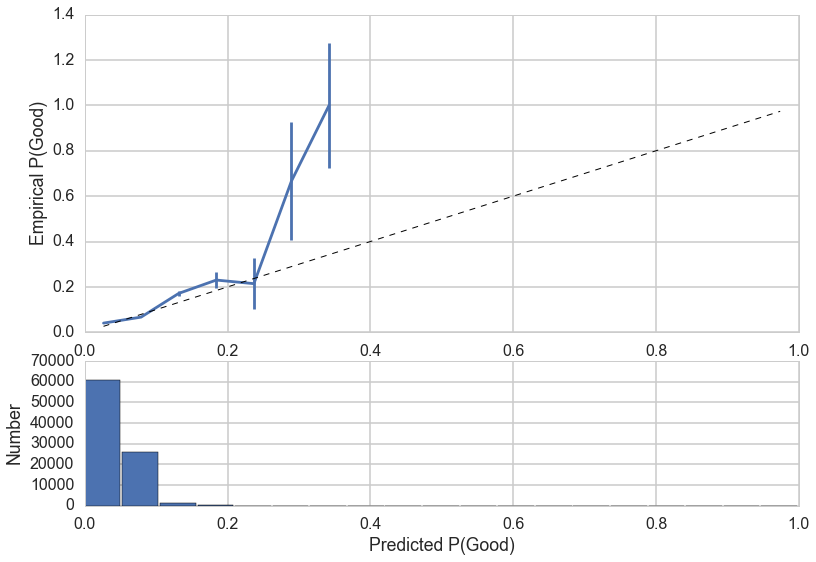

In [272]:
calibration_plot(clf, xtest, ytest)

# Reducing the scope did not have much improvements either

# LDA

We also performed an LDA model to see if the features given woudl be good

In [44]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(politics.shape[0]), train_size=0.7)
mask=np.ones(politics.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [45]:
from sklearn.svm import LinearSVC

In [46]:
lcols=['controversiality', 'created_utc', 'downs', 'gilded', 'comment_length', 'n_tokens', 'time']

In [47]:
clfsvm=LinearSVC(loss="hinge")
Cs=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
Xmatrix=politics[lcols].values
Yresp=politics['ups'].values

In [48]:
Xmatrix_train=Xmatrix[mask]
Xmatrix_test=Xmatrix[~mask]
Yresp_train=Yresp[mask]
Yresp_test=Yresp[~mask]

In [50]:
from sklearn.grid_search import GridSearchCV
parameters = {"C": Cs}
fitmodel = GridSearchCV(clfsvm, param_grid=parameters, cv=5, scoring="accuracy")
fitmodel.fit(Xmatrix_train, Yresp_train)
best = fitmodel.best_params_["C"]
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_

(LinearSVC(C=10.0, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
      penalty='l2', random_state=None, tol=0.0001, verbose=0),
 {'C': 10.0},
 0.19377606673083092,
 [mean: 0.11015, std: 0.09866, params: {'C': 0.001},
  mean: 0.13175, std: 0.12260, params: {'C': 0.01},
  mean: 0.10705, std: 0.11783, params: {'C': 0.1},
  mean: 0.12041, std: 0.14325, params: {'C': 1.0},
  mean: 0.19378, std: 0.12268, params: {'C': 10.0},
  mean: 0.13250, std: 0.10985, params: {'C': 100.0}])

In [51]:
from sklearn.metrics import accuracy_score
clfsvm.fit(Xmatrix_train, Yresp_train)
ypred2=clfsvm.predict(Xmatrix_test)
accuracy_score(ypred2, Yresp_test)

0.28617764471057883

As we can see, it does not have the best accruacy. Alot of the features have very poor predictive powers